<H2> Project  - 7 CAPESTONE  - Churning Customer Telecom Sector</H2>

<H5> ImportingLibraries  </H5>

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<H3> Loading the data </H3>

In [41]:
df = pd.read_csv("https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130",index_col='customerID')

In [42]:
df.shape

(7043, 20)

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [45]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [46]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<H3> The above data shows 1869 customers are churned</H3> 

<H3> Data Cleansing - check missing values </H3>

In [47]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [48]:
df.info()  # To check if the data and data type matches like numeric value columns should be numeric data type. 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [49]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<H4> Total Charges should be float but it is an object datatype </H4>

In [50]:
df[df['TotalCharges'].isna()] # check if there is any null value in Total Charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [51]:
len(df[df['TotalCharges'].isna()])

0

In [52]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

<H5> There are spaces in 11 columns in Total Charges . We need to replace these values with Nan values and then convert it to Numeric datatype </H5> 

In [53]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
19.45       6
20.25       6
20.15       6
20.3        5
20.45       5
20.35       4
75.3        4
49.9        4
19.3        4
69.9        4
19.95       4
20.5        4
19.5        4
19.85       4
69.65       4
69.6        4
19.2        4
44          4
70.6        4
44.4        4
50.15       4
19.4        4
           ..
129.2       1
5764.7      1
3794.5      1
1784.9      1
8547.15     1
547.65      1
5638.3      1
889.9       1
105.5       1
115.95      1
780.1       1
5166.2      1
4532.3      1
7176.55     1
2130.45     1
140.1       1
6841.45     1
248.4       1
7362.9      1
612.95      1
1434.6      1
781.25      1
225.65      1
1191.2      1
5293.95     1
8192.6      1
1219.85     1
2619.15     1
3283.05     1
273.2       1
Name: TotalCharges, Length: 6531, dtype: int64

In [54]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)  # Replace the space with Nan or null values

In [55]:
#Convert the column type to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [57]:
# Replace the 11 values which are now null with Mean values 
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [58]:
# select categorical columns to visualise data
df_categorical = df.select_dtypes(include=object)
column_categorical = df_categorical.columns

In [59]:
# select categorical columns to visualise data
df_numerical = df.select_dtypes(include=np.float)
column_numerical = df_numerical.columns

<H3> Visualising Data - Graphs </H3>

In [60]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None


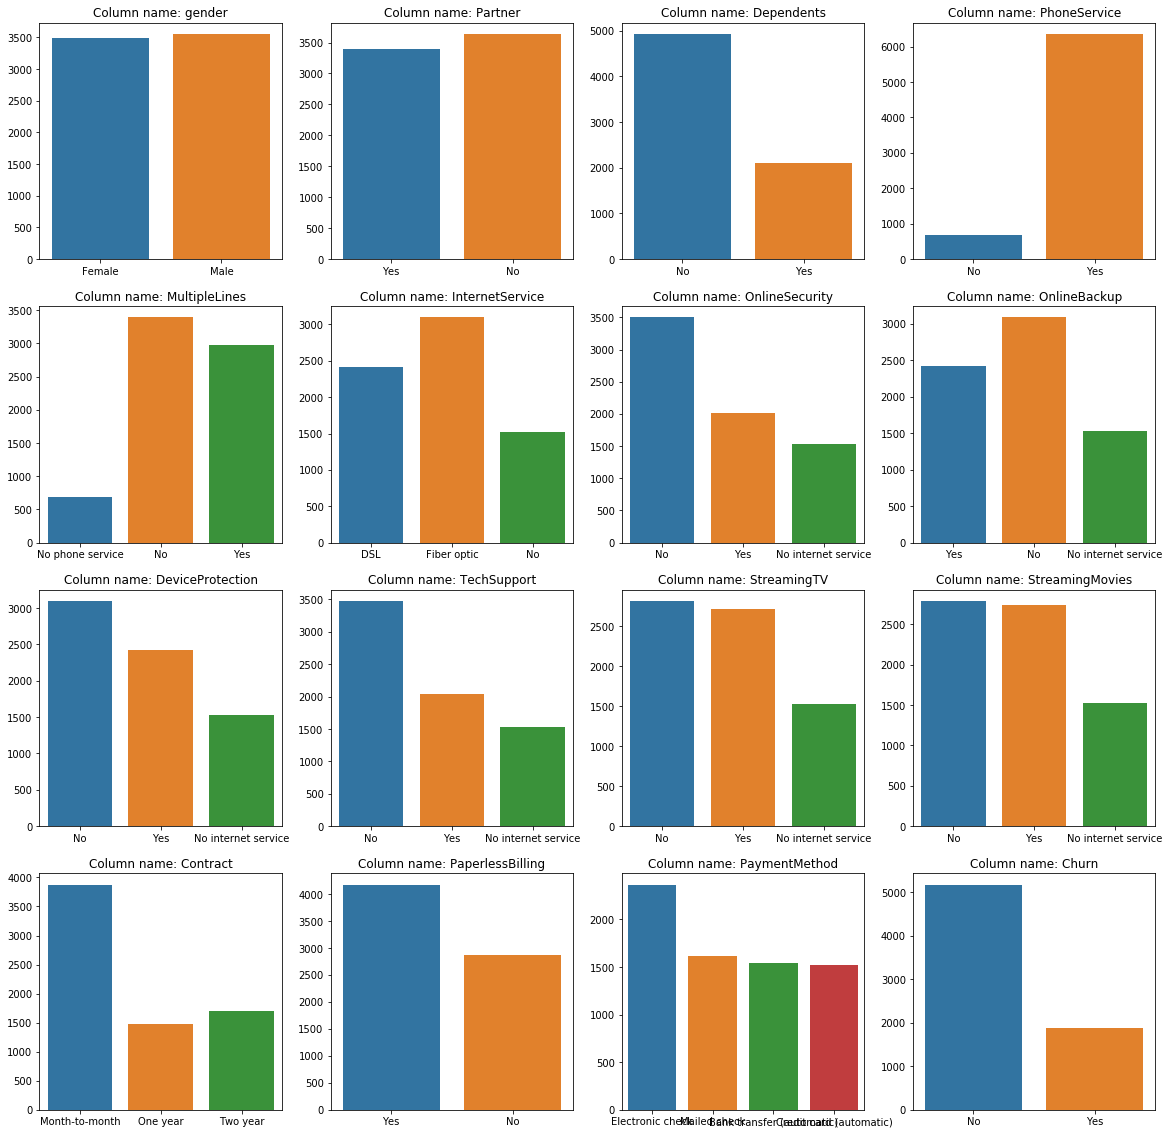

In [61]:
display_plot(df, 'customerid', object_mode = True) # Graph for Categorical columns

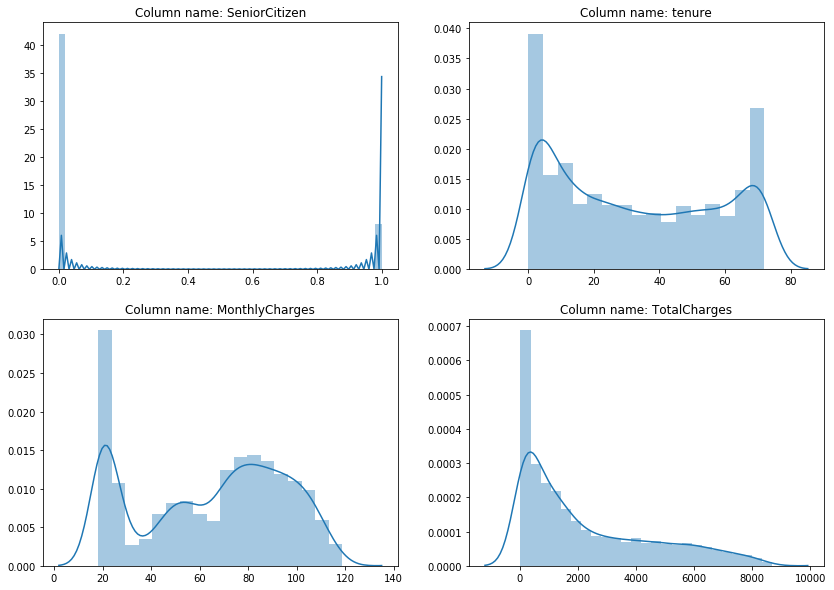

In [62]:
display_plot(df, 'customerid', object_mode = False) # Graph for numercial columns

<H5> Multiple lines can be there only if Subscribe has Phone service as yes.To check the data, we wil use Crosstab function  </H5>

In [63]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


<H5> StreamingTV can be there only if Subscribe has InternetService as yes.To check the data, we wil use Crosstab function  </H5>

In [64]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


<H5> StreamingMovies can be there only if Subscribe has InternetService as yes.To check the data, we wil use Crosstab function  </H5>

In [65]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1440,0,981
Fiber optic,1345,0,1751
No,0,1526,0


<H5> The above redundant information like PhoneService and MultipleLines; InternetService and StreamingTV & StreamingMovies;we will transform the column 
Eg: if the PhoneService column value as "No" , and "No Phone service" as "No" 
</H5>

In [66]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df


In [67]:
col = "MultipleLines"
df[df[col].str.contains("No")][col].unique()

array(['No phone service', 'No'], dtype=object)

In [68]:
df = convert_no_service(df)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [69]:
col = "MultipleLines"
df[df[col].str.contains("No")][col].unique()

array(['No'], dtype=object)

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


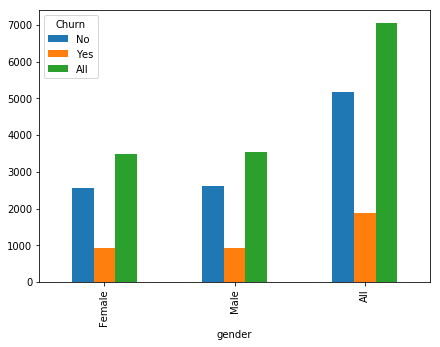

In [70]:
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100))


<H5> By looking at the above graph , Gender and Churn is connected </H5>

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


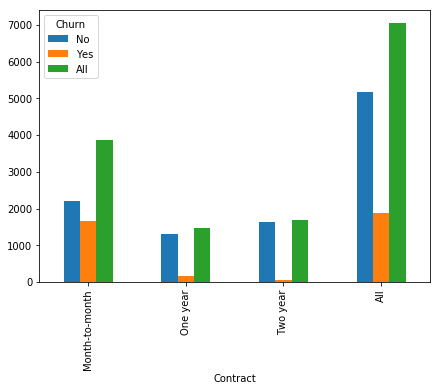

In [71]:
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))


<H5>People with month- month contract leaving rapidly </H5>

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


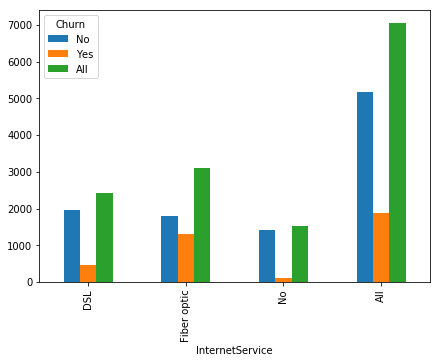

In [72]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))


<H5> People with internet service are leaving with Fiber optic </H5>

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


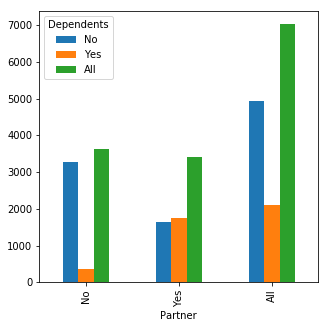

In [73]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))


Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


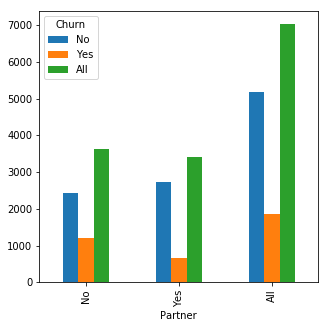

In [74]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));


<H5> No partner then more churn </H5>

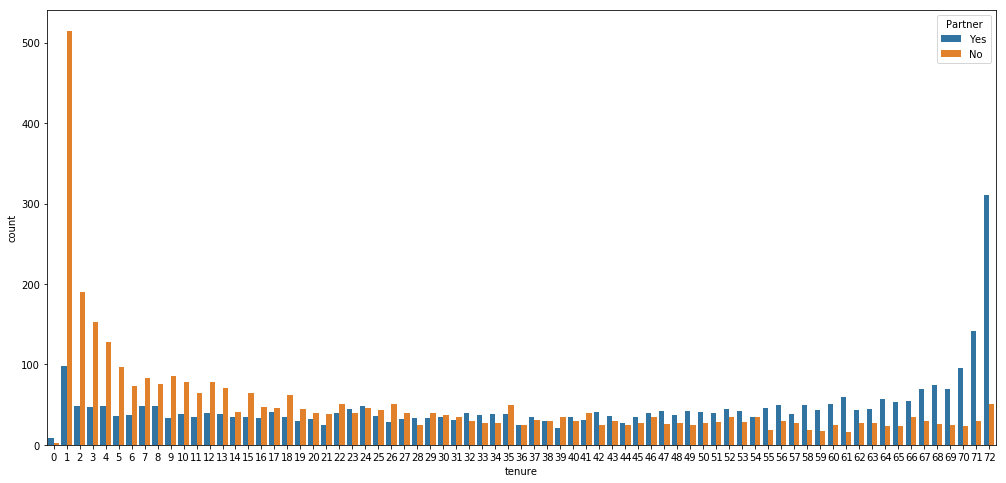

In [75]:
# Tenure Vs Partner
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);


<H5>Shorter tenure, there is no partner. If there is a partner then you will stay with the provider </H5>

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


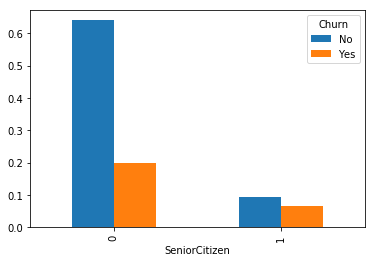

In [77]:
# Senior citizen and Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');


<H5> Senior Citizen have churned more  </H5>

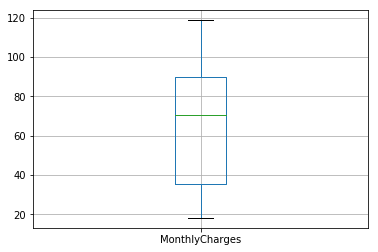

In [78]:
df.boxplot('MonthlyCharges');


<H5> There are no out layers from the above box graph </H5>

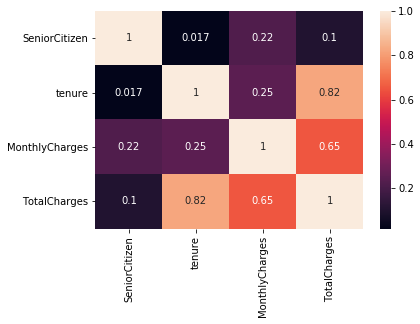

In [57]:
#Cross Correlation matrix
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);


<H5> If Tenure is high the Total charges is likely to be high. So the Total Charges will be monthly charges times the tenure plus some extra charges </H5>

<H4> Convert into Categorical columns </H4>

In [79]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)


In [80]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [84]:
from sklearn.preprocessing import LabelEncoder # to convert into one hot vector
from sklearn.preprocessing import StandardScaler 
Id_col     = ['customerID']
target_col = ["Churn"]

In [85]:
# if unique value of the column is less than 6 then convert into categorical.
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist() 
cat_cols   = [x for x in cat_cols if x not in target_col]

num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
# if the unique values are only two then they are binary columns
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]
le = LabelEncoder()
# for binary columns, we use label encoders.
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
#if it is multicols then we use get dummies
df = pd.get_dummies(data = df,columns = multi_cols )

In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


<H4> Scale the Data </H4>

In [95]:
telcom = df
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols, index = telcom.index)

C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [97]:
telcom

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.994971
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.173876
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,-1.236724,-0.362660,-0.960399
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.514251,-0.746535,-0.195400
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,-1.236724,0.197365,-0.941193
9305-CDSKC,0,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,-0.992402,1.159546,-0.645874
1452-KIOVK,1,0,0,1,1,1,0,1,0,0,...,0,0,0,1,0,0,0,-0.422317,0.808907,-0.147428
6713-OKOMC,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,-0.910961,-1.163647,-0.874852
7892-POOKP,0,0,1,0,1,1,0,0,1,1,...,1,0,0,0,1,0,0,-0.177995,1.330711,0.336779


In [98]:
scaled

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.277445,-1.160323,-0.994971
5575-GNVDE,0.066327,-0.259629,-0.173876
3668-QPYBK,-1.236724,-0.362660,-0.960399
7795-CFOCW,0.514251,-0.746535,-0.195400
9237-HQITU,-1.236724,0.197365,-0.941193
9305-CDSKC,-0.992402,1.159546,-0.645874
1452-KIOVK,-0.422317,0.808907,-0.147428
6713-OKOMC,-0.910961,-1.163647,-0.874852
7892-POOKP,-0.177995,1.330711,0.336779


In [99]:
telcom

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.994971
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.173876
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,-1.236724,-0.362660,-0.960399
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.514251,-0.746535,-0.195400
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,-1.236724,0.197365,-0.941193
9305-CDSKC,0,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,-0.992402,1.159546,-0.645874
1452-KIOVK,1,0,0,1,1,1,0,1,0,0,...,0,0,0,1,0,0,0,-0.422317,0.808907,-0.147428
6713-OKOMC,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,-0.910961,-1.163647,-0.874852
7892-POOKP,0,0,1,0,1,1,0,0,1,1,...,1,0,0,0,1,0,0,-0.177995,1.330711,0.336779


In [100]:
np.std(scaled["tenure"])

1.0000000000000047

In [101]:
np.mean(scaled["tenure"])

5.945990698404217e-17

<H3> Build the Model </H3>

In [104]:
# Import packages for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

<H4> Split into test and train </H4>

In [145]:
target_col = telcom["Churn"]
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

In [146]:
cols    = [i for i in telcom.columns if i not in  target_col]
X_train = train[cols]
y_train = train["Churn"]
X_test  = test[cols]
y_test  = test["Churn"]

In [147]:
target_col = ["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
cols    = [i for i in telcom.columns if i not in  target_col]
X_train = train[cols]
y_train = train["Churn"]
X_test  = test[cols]
y_test  = test["Churn"]


In [148]:
X_train.shape

(5282, 31)

In [149]:
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier


In [150]:
from sklearn import datasets, model_selection, metrics , preprocessing
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [151]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import time
import io, os, sys, types, time, datetime, math, random

<H4> Functions to plot ROC curve, fitting a model and Generating a report </H4>

In [152]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [153]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs


In [154]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [155]:
# Dummy Model - predict no for everything to get the accurancy if we are not using any model
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [156]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.7535491198182851

<H3> Get around 75% accuracy without building a model</H3>

In [157]:
preds = clf.predict(X_test)


In [158]:
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)


In [159]:
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))


Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:01.210938
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

In [160]:
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}


In [161]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 1.26 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.797 (std: 0.005)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.0741095118420954e-12, 'class_weight': None, 'C': 4.678073130688932}

Model with rank: 2
Mean validation score: 0.797 (std: 0.005)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.6962111745609664e+17, 'class_weight': None, 'C': 1219.8561803315788}

Model with rank: 3
Mean validation score: 0.796 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 106.21910072473992, 'class_weight': None, 'C': 119.73133386520675}

Model with rank: 3
Mean validation score: 0.796 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4.592680212467436, 'class_weight': None, 'C': 342415.5314134041}

Model with rank: 5
Mean validation score: 0.743 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 5.059066720355097e-20, 'class_weight': 'balanced', 'C': 1991727514825.932}



C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<H3> Logistic Regression Model </H3>

C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 80.98
Accuracy CV 10-Fold: 80.22
Running Time: 0:00:00.753558
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.63      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.73      0.73      1761
weighted avg       0.80      0.81      0.81      1761



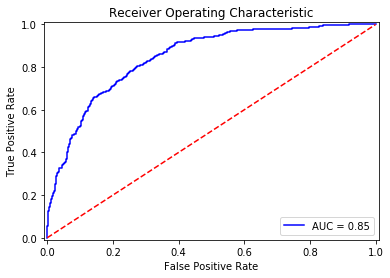

In [162]:
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

print (metrics.classification_report(y_train, train_pred_log))

print (metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)

In [163]:
X_train.shape

(5282, 31)

<H3>k-Nearest Neighbors Model </H3>

Accuracy: 75.92
Accuracy CV 10-Fold: 75.65
Running Time: 0:00:01.987407
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3847
           1       0.55      0.53      0.54      1435

   micro avg       0.76      0.76      0.76      5282
   macro avg       0.69      0.69      0.69      5282
weighted avg       0.75      0.76      0.75      5282

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1327
           1       0.51      0.55      0.53       434

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.68      0.69      0.68      1761
weighted avg       0.77      0.76      0.76      1761



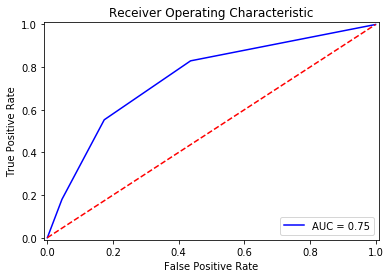

In [164]:

start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

print (metrics.classification_report(y_train, train_pred_knn))

print (metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)


<H3> Gaussian Naive Bayes Model </H3>

Accuracy: 73.82
Accuracy CV 10-Fold: 74.73
Running Time: 0:00:00.380276
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3847
           1       0.52      0.78      0.63      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.71      0.76      0.72      5282
weighted avg       0.80      0.75      0.76      5282

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1327
           1       0.48      0.81      0.60       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.74      0.76      1761



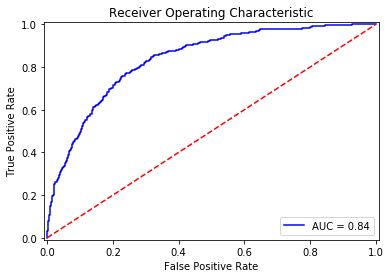

In [165]:

start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian)) 

print (metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

<H3>Decision Tree Classifier Model</H3>

Accuracy: 74.45
Accuracy CV 10-Fold: 71.89
Running Time: 0:00:00.835619
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3847
           1       0.48      0.49      0.48      1435

   micro avg       0.72      0.72      0.72      5282
   macro avg       0.65      0.65      0.65      5282
weighted avg       0.72      0.72      0.72      5282

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1327
           1       0.48      0.55      0.51       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.66      0.68      0.67      1761
weighted avg       0.76      0.74      0.75      1761



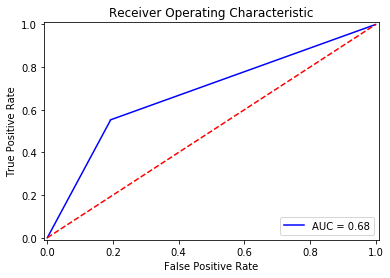

In [166]:
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt))

plot_roc_curve(y_test, probs_dt)

<H3>Random Forest Classifier Model </H3>

In [167]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [168]:
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 2.09 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 13}

Model with rank: 2
Mean validation score: 0.796 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 9, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.796 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 18}

Model with rank: 4
Mean validation score: 0.794 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}

Model with rank: 5
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'ma

Accuracy: 80.12
Accuracy CV 10-Fold: 78.7
Running Time: 0:00:01.207849
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3847
           1       0.64      0.51      0.56      1435

   micro avg       0.79      0.79      0.79      5282
   macro avg       0.73      0.70      0.71      5282
weighted avg       0.78      0.79      0.78      5282

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1327
           1       0.61      0.52      0.56       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.80      0.80      1761



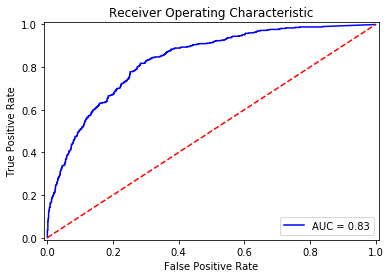

In [169]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf)) 

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

<H3> Gradient Boosting Trees Model</H3>

Accuracy: 80.64
Accuracy CV 10-Fold: 80.18
Running Time: 0:00:07.406260
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.62      0.55      0.58       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



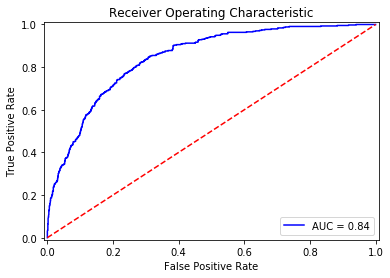

In [170]:
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt)) 

print (metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

<H3> Comparing the scores of different Models</H3>

In [181]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 
              'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,80.98
5,Gradient Boosting Trees,80.64
2,Random Forest,80.12
0,KNN,75.92
4,Decision Tree,74.45
3,Naive Bayes,73.82


In [182]:
models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
]

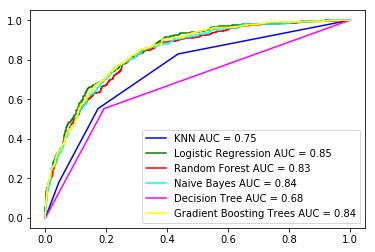

In [180]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

<H3> On comparing the models, Logistic Regression is giving the best accuracy for Capestone Telecom Churning data</H3>